In [1]:
import lammps_logfile
import numpy as numpy
from numpy import ndarray
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot

# Extract time and CNT length data from `output_cnt_length.dat` file and convert time from femtoseconds to picoseconds

In [2]:
# File contains columns of data, the .T transpose operation switches them to rows, making it easier to
# unpack into separate variables
time, cnt_length = numpy.loadtxt(
    '../data/raw/length-vs-time/output_cnt_length.dat'
).T

# Convert time from femtoseconds to picoseconds
time /= 1000

# Create Matplotlib graph to plot CNT length vs time for CNT with unbreakable bonds

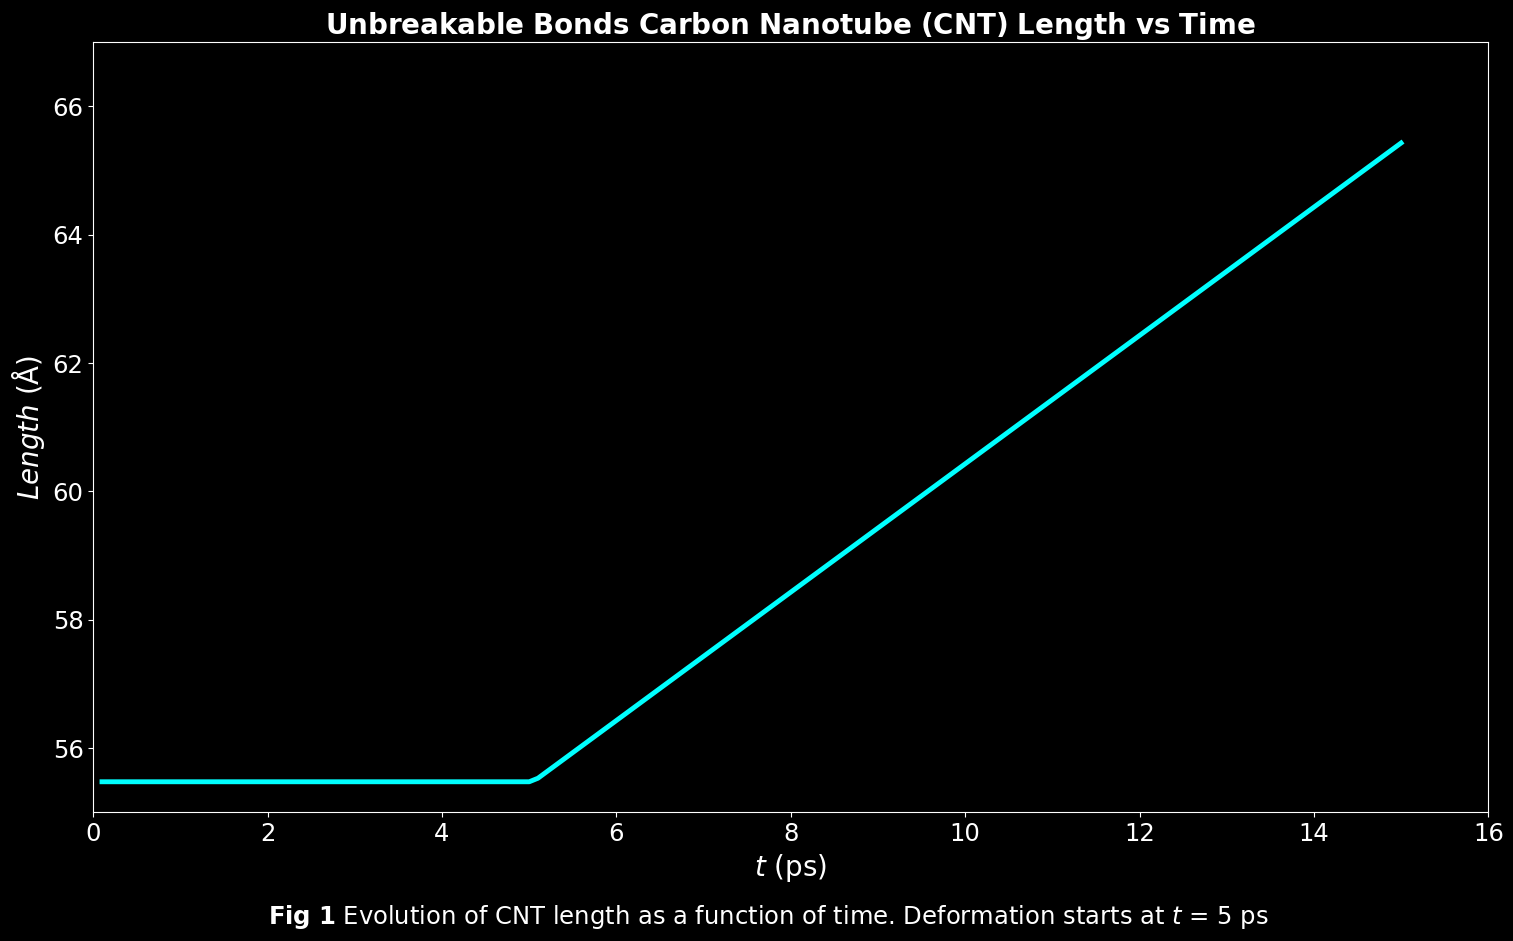

In [3]:
# Set up the line graph
cnt_length_vs_time_line_graph_figure, cnt_length_vs_time_line_graph_axes = pyplot.subplots(figsize=(18, 10))
cnt_length_vs_time_line_graph_figure.patch.set_facecolor('black')
cnt_length_vs_time_line_graph_axes.set_facecolor('black')

# Stylise ticks and spines
cnt_length_vs_time_line_graph_axes.tick_params(colors='white', which='both', labelsize=17.5)
for spine in cnt_length_vs_time_line_graph_axes.spines.values():
    spine.set_edgecolor('white')

# Plot the data
cnt_length_vs_time_line_graph_axes.plot(time, cnt_length, color='cyan', 
                                linewidth=3.5)

# Set axes labels, limits and graph title
cnt_length_vs_time_line_graph_axes.set_xlabel(r'$t$ (ps)', color='white', fontsize=20)
cnt_length_vs_time_line_graph_axes.set_ylabel(r'$Length$ (Å)', color='white', fontsize=20)
cnt_length_vs_time_line_graph_axes.set_xlim(0, 16)
cnt_length_vs_time_line_graph_axes.set_ylim(55, 67)
cnt_length_vs_time_line_graph_axes.set_title(
    r'$\bf{Unbreakable\ Bonds\ Carbon\ Nanotube\ (CNT)\ Length\ vs\ Time}$', 
    fontsize=20, color='white'
)

# Add figure title
cnt_length_vs_time_line_graph_figure.text(0.5, 0.005,
                r'$\bf{Fig\ 1}$ Evolution of CNT length as a function of time. Deformation starts at $t$ = 5 ps',
                ha='center', va='center', color='white', fontsize=17.5)

# Save & display the plot
pyplot.savefig('../reports/figures/graphs/cnt_length_vs_time.png', bbox_inches='tight')
pyplot.show()

# Extract time and total energy data for first & second simulation run from log file and convert time from femtoseconds to picoseconds

In [4]:
# Extract first-input-log.lammps log file data & instantiate lammps_logfile.File object
log_file: lammps_logfile.File = lammps_logfile.File('../logs/cnt-unbreakable-bonds-log.lammps')

# Extract first run time from lammps_logfile.File object and convert from fs to ps
time_first_run: ndarray = log_file.get('Step', run_num=0) / 1000
# Extract first run total energy from lammps_logfile.File object
total_energy_first_run: ndarray = log_file.get('TotEng', run_num=0)

# Extract first run time from lammps_logfile.File object and convert from fs to ps
time_second_run: ndarray = log_file.get('Step', run_num=1) / 1000
# Extract first run total energy from lammps_logfile.File object
total_energy_second_run: ndarray = log_file.get('TotEng', run_num=1)

# Create Matplotlib graph to plot CNT system total energy vs time for CNT with unbreakable bonds

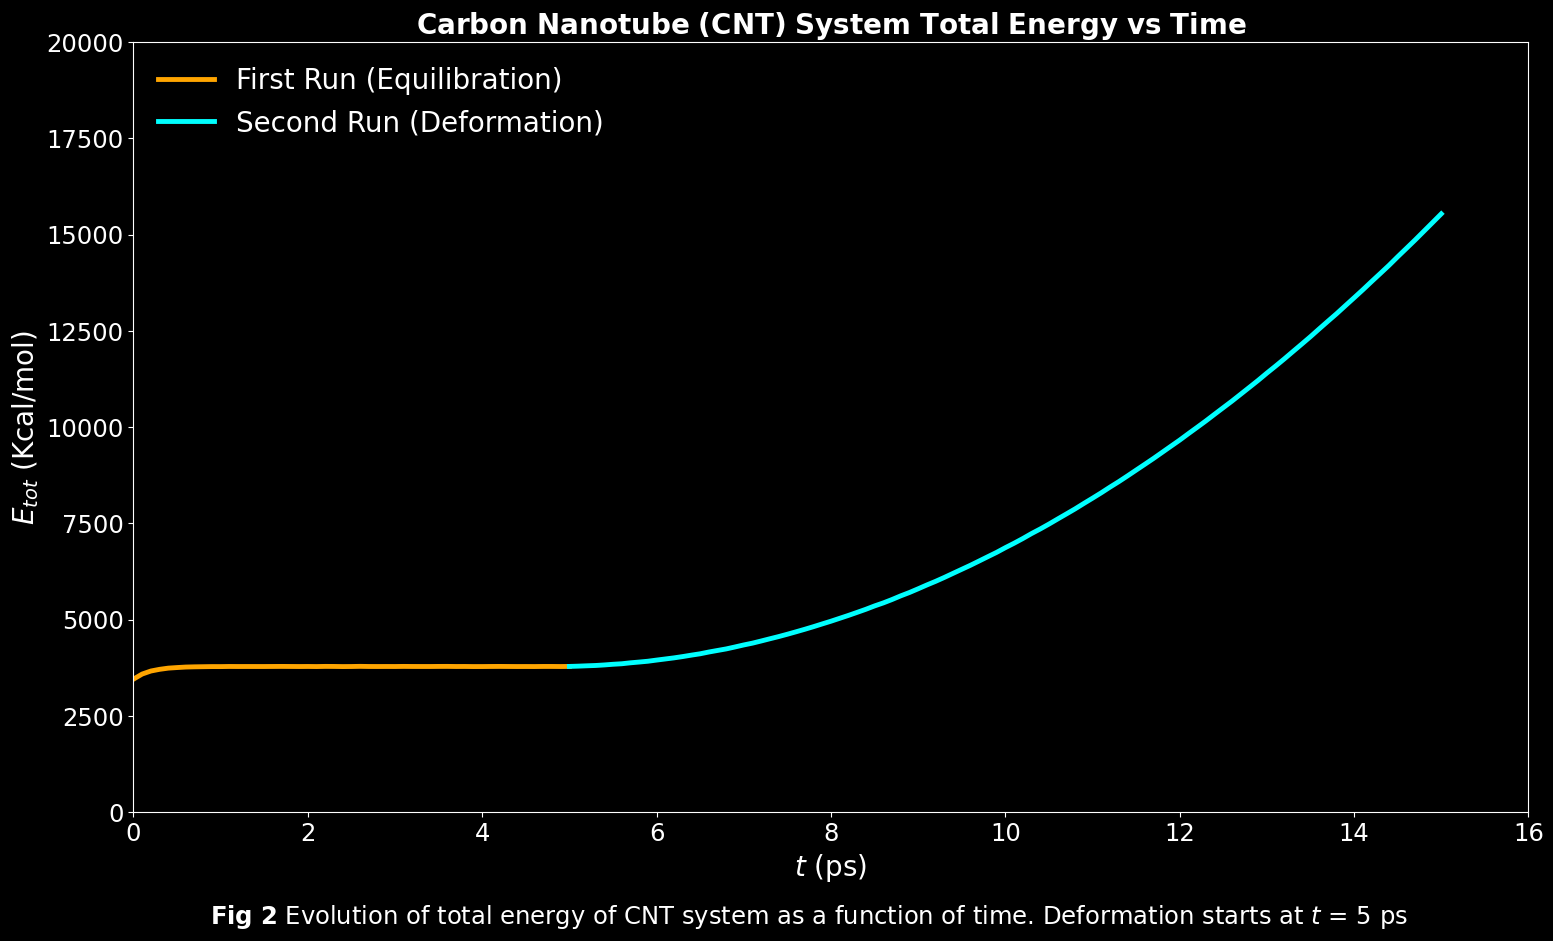

In [5]:
# Set up the line graph
cnt_total_energy_vs_time_line_graph_figure, cnt_total_energy_vs_time_line_graph_axes = pyplot.subplots(figsize=(18, 10))
cnt_total_energy_vs_time_line_graph_figure.patch.set_facecolor('black')
cnt_total_energy_vs_time_line_graph_axes.set_facecolor('black')

# Stylise ticks and spines
cnt_total_energy_vs_time_line_graph_axes.tick_params(colors='white', which='both', labelsize=17.5)
for spine in cnt_total_energy_vs_time_line_graph_axes.spines.values():
    spine.set_edgecolor('white')

# Plot the data
cnt_total_energy_vs_time_line_graph_axes.plot(time_first_run, total_energy_first_run, color='orange', 
                                linewidth=3.5, label='First Run (Equilibration)')
cnt_total_energy_vs_time_line_graph_axes.plot(time_second_run, total_energy_second_run, color='cyan', 
                                linewidth=3.5, label='Second Run (Deformation)')

# Set axes labels, limits and graph title
cnt_total_energy_vs_time_line_graph_axes.set_xlabel(r'$t$ (ps)', color='white', fontsize=20)
cnt_total_energy_vs_time_line_graph_axes.set_ylabel(r'$E_{tot}$ (Kcal/mol)', color='white', fontsize=20)
cnt_total_energy_vs_time_line_graph_axes.set_xlim(0, 16)
cnt_total_energy_vs_time_line_graph_axes.set_ylim(0, 20000)
cnt_total_energy_vs_time_line_graph_axes.set_title(r'$\bf{Carbon\ Nanotube\ (CNT)\ System\ Total\ Energy\ vs\ Time}$', 
                                     fontsize=20, color='white')

# Add legend
cnt_total_energy_vs_time_legend: Legend = cnt_total_energy_vs_time_line_graph_axes.legend(
    loc='upper left', frameon=False, fontsize=20
)
for text in cnt_total_energy_vs_time_legend.get_texts():
    text.set_color('white')

# Add figure title
cnt_total_energy_vs_time_line_graph_figure.text(0.5, 0.005,
                r'$\bf{Fig\ 2}$ Evolution of total energy of CNT system as a function of time. Deformation starts at $t$ = 5 ps',
                ha='center', va='center', color='white', fontsize=17.5)

# Save & display the plot
pyplot.savefig('../reports/figures/graphs/cnt_total_energy_vs_time.png', bbox_inches='tight')
pyplot.show()